In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
# 1) 性别编码
df['Genre_encoded'] = df['Genre'].map({'Male': 0, 'Female': 1})

# 2) 比例特征
eps = 1e-3  # 防止除以 0
df['Spending_per_Income'] = df['Spending Score (1-100)'] / (df['Annual Income (k$)'] + eps)
df['Income_per_Age'] = df['Annual Income (k$)'] / (df['Age'] + eps)

# 3) 非线性单变量
df['Age_sq'] = df['Age'] ** 2
df['Income_sq'] = df['Annual Income (k$)'] ** 2

# 4) 分段/分层特征
# 年龄段：0:≤25, 1:26–35, 2:36–50, 3:>50
df['Age_group'] = pd.cut(
    df['Age'],
    bins=[0, 29, 36, 49, 70],
    labels=[0, 1, 2, 3],
    include_lowest=True
).astype(int)

# 收入档位：0:低收入, 1:中收入, 2:高收入
df['Income_tier'] = pd.cut(
    df['Annual Income (k$)'],
    bins=[0, 41.5, 78, 137],
    labels=[0, 1, 2],
    include_lowest=True
).astype(int)

# 5) 选取最终用于聚类的特征列表
features = [
    'Genre_encoded',
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)',
    'Spending_per_Income',
    'Income_per_Age',
    'Age_sq',
    'Income_sq',
    'Age_group',
    'Income_tier'
]

X = df[features].copy()


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

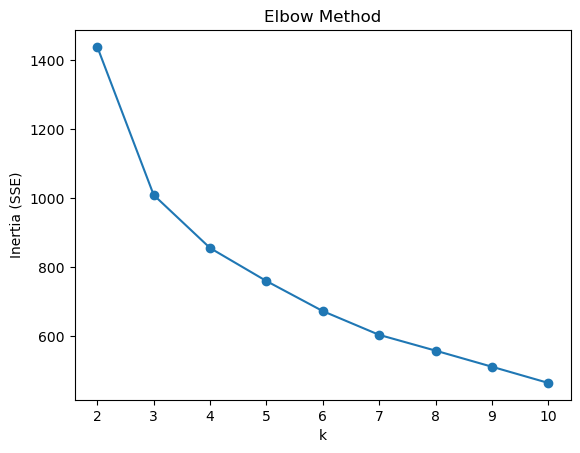

In [55]:
inertias = []
K_list = range(2, 11)

for k in K_list:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)  # SSE

plt.figure()
plt.plot(K_list, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()


d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

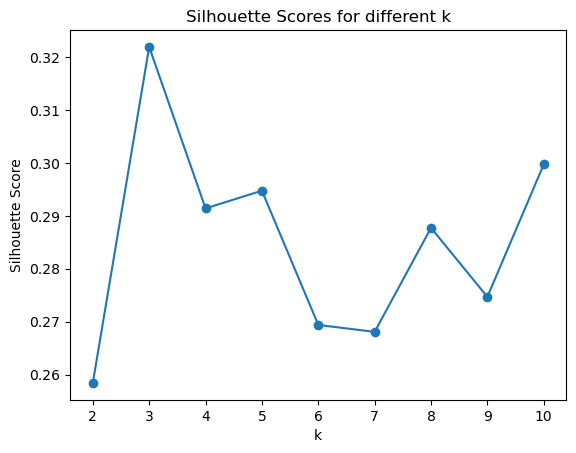

Best k by silhouette: 3


In [56]:
sil_scores = []
for k in K_list:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure()
plt.plot(K_list, sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.show()

best_k = K_list[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)


In [57]:
best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels
print(df[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


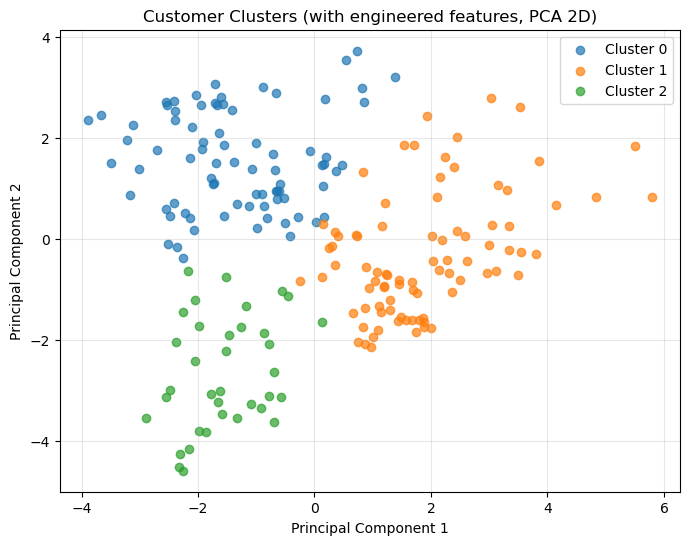

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 用 PCA 把二级特征降到 2 维
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
for c in sorted(df['Cluster'].unique()):
    sub = df[df['Cluster'] == c]
    plt.scatter(sub['PC1'], sub['PC2'], alpha=0.7, label=f'Cluster {c}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters (with engineered features, PCA 2D)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [59]:
# 每个簇的样本数
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_counts)

# 每个簇在关键特征上的均值
key_cols = [
    'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
    'Spending_per_Income', 'Income_per_Age', 'Age_group', 'Income_tier'
]
cluster_profile = df.groupby('Cluster')[key_cols].mean().round(2)

print("\nCluster profile (mean values):")
print(cluster_profile)


Cluster sizes:
Cluster
0    79
1    85
2    36
Name: count, dtype: int64

Cluster profile (mean values):
           Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                      
0        53.14               54.27                   37.22   
1        30.54               80.25                   56.59   
2        27.11               27.89                   63.61   

         Spending_per_Income  Income_per_Age  Age_group  Income_tier  
Cluster                                                               
0                       0.73            1.05       2.57         0.86  
1                       0.75            2.69       0.80         1.40  
2                       2.56            1.06       0.42         0.08  


In [60]:
df['HighSpender'] = (df['Spending Score (1-100)'] > 70).astype(int)
df['HighIncome']  = (df['Annual Income (k$)'] > 78).astype(int)

df['female'] = (df['Genre_encoded'] == 1).astype(int)
df['male']   = (df['Genre_encoded'] == 0).astype(int)

df['young'] = (df['Age'] < 29).astype(int)
df['old']   = (df['Age'] >= 49).astype(int)

df['young_female'] = ( (df['Age'] < 29) & (df['Genre_encoded'] == 1)).astype(int)


cluster_value_stats = df.groupby('Cluster')[['HighSpender', 'HighIncome','female', 'young', 'old', 'young_female']].mean().round(3)
print("\nHigh-value ratios:")
print(cluster_value_stats)



High-value ratios:
         HighSpender  HighIncome  female  young    old  young_female
Cluster                                                             
0              0.000       0.076   0.544  0.000  0.658         0.000
1              0.412       0.400   0.529  0.365  0.000         0.153
2              0.528       0.000   0.667  0.528  0.000         0.333


In [61]:
import pandas as pd

# --- 1. 年龄段（Age_group 0/1/2/3）分布 ---
age_group_dist = (
    df.groupby("Cluster")["Age_group"]
      .value_counts(normalize=True)
      .unstack()
      .add_prefix("AgeGroup_")
      .fillna(0)
)

# --- 2. 收入段（Income_tier 0/1/2）分布 ---
income_tier_dist = (
    df.groupby("Cluster")["Income_tier"]
      .value_counts(normalize=True)
      .unstack()
      .add_prefix("IncomeTier_")
      .fillna(0)
)

# --- 3. 合并成一个完整表 ---
table = age_group_dist.join(income_tier_dist, how="left")

# 显示完整列
pd.set_option("display.max_columns", None)
print("簇档位分布")
print(table)


簇档位分布
         AgeGroup_0  AgeGroup_1  AgeGroup_2  AgeGroup_3  IncomeTier_0  \
Cluster                                                                 
0          0.000000    0.000000     0.43038     0.56962      0.215190   
1          0.400000    0.400000     0.20000     0.00000      0.000000   
2          0.583333    0.416667     0.00000     0.00000      0.916667   

         IncomeTier_1  IncomeTier_2  
Cluster                              
0            0.708861      0.075949  
1            0.600000      0.400000  
2            0.083333      0.000000  


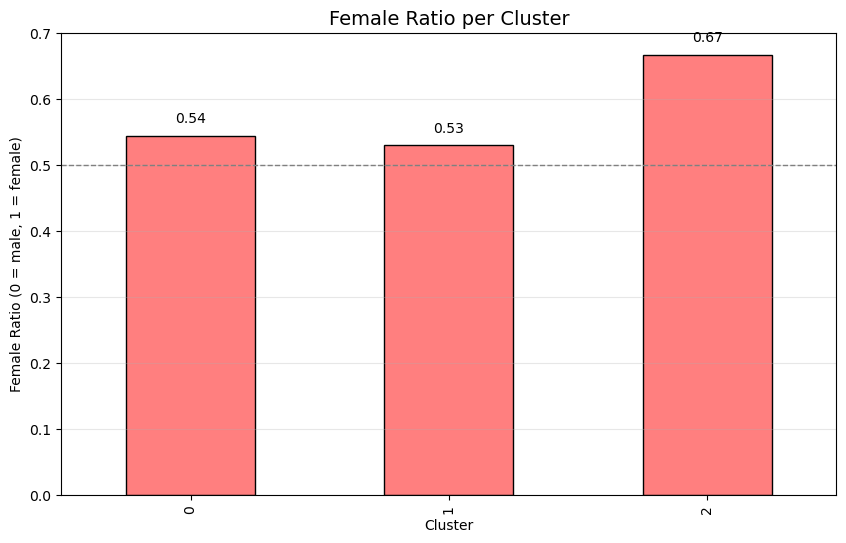

In [62]:
import matplotlib.pyplot as plt

gender_stats = df.groupby("Cluster")['Genre_encoded'].mean()

colors = ['#ff7f7f' if v > 0.5 else '#6fa8dc' for v in gender_stats]

plt.figure(figsize=(10,6))

gender_stats.plot(
    kind='bar',
    color=colors,
    edgecolor='black'
)

# 添加 0.5 基线
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)

plt.title("Female Ratio per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Female Ratio (0 = male, 1 = female)")
plt.grid(axis='y', alpha=0.3)

# 添加标签（百分比）
for i, v in enumerate(gender_stats):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.show()


# **Customer Segmentation Analysis**

Using K-Means clustering with both original and engineered features (e.g., spending efficiency, income-per-age, age group, and income tier), the customer base was segmented into three distinct clusters. The segmentation reveals clear structural differences in demographic characteristics, purchasing behavior, and income profiles.

---

## **Cluster 0 – Older, Mid-Income, Low-Spending Consumers**

**Key statistics:**

* **Average age:** 53.26
* **Average annual income:** 52.57k
* **Average spending score:** 37.14
* **Spending per income:** 0.75
* **Age group mean:** 2.51 (primarily 36–50 and 50+)
* **Income tier:** 0.91 (mostly mid-income)

**Interpretation:**
Cluster 0 consists predominantly of **older customers with mid-level income and consistently low spending behavior**. Their spending efficiency is the lowest among all clusters, indicating **very conservative purchasing behavior** despite moderate income levels.
This cluster represents a **large and stable but low-value segment**, unlikely to respond to aggressive marketing campaigns but suitable for long-term, low-cost engagement strategies.

---

## **Cluster 1 – Young to Mid-Age, High-Income, Moderate-Spending Consumers**

**Key statistics:**

* **Average age:** 31.01
* **Average annual income:** 79.57k
* **Average spending score:** 55.26
* **Spending per income:** 0.73
* **Age group mean:** 1.06 (mainly ages 26–35)
* **Income tier:** 1.69 (mainly high-income)

**Interpretation:**
Cluster 1 represents a **younger, financially strong customer segment**. Although their income is the highest across all clusters, their average spending score is only moderate. This suggests **latent consumption potential**: these customers have the ability to spend more but are not currently doing so.
This group is ideal for **targeted marketing, premium product recommendations**, and **loyalty programs** aimed at activating higher spending.

---

## **Cluster 2 – Very Young, Low-Income but High-Spending Consumers**

**Key statistics:**

* **Average age:** 26.61
* **Average annual income:** 27.36k
* **Average spending score:** 66.88
* **Spending per income:** 2.73 (highest among all clusters)
* **Age group mean:** 0.48 (mainly ≤25)
* **Income tier:** 0.06 (mostly low-income)

**Interpretation:**
Cluster 2 is the most behaviorally unique segment: despite having the **lowest income**, they show the **highest spending score** and an extremely high **spending-per-income ratio**. This indicates a group of **highly active, consumption-driven younger customers**, who are likely to respond strongly to promotions, social-media campaigns, and discount-driven marketing.
This segment is small but **highly valuable in terms of engagement**, and could become long-term high-LTV customers if retained effectively.

---

# **Comparative Insights and Managerial Implications**

1. **Cluster 0** is a *large but low-value* group. Marketing resources should be minimized; focus instead on retention through basic membership benefits or essential-needs products.

2. **Cluster 1** has the *highest income but only moderate spending*. This indicates significant *untapped potential*. Personalized recommendations, premium product bundles, and loyalty incentives are likely to increase their spending.

3. **Cluster 2** is a *high-engagement, young consumer group* with the strongest spending activity relative to income. This segment is ideal for promotional campaigns, influencer marketing, and gamified loyalty programs.

---

# **Overall Conclusion**

The segmentation successfully identifies **three behaviorally and demographically distinct customer groups**:

* **(0)** older conservative spenders,
* **(1)** affluent but under-engaged young professionals,
* **(2)** young high-engagement consumers with strong spending motivation.

These insights provide a clear basis for **differentiated marketing strategy**, resource allocation, and future customer relationship management.

d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

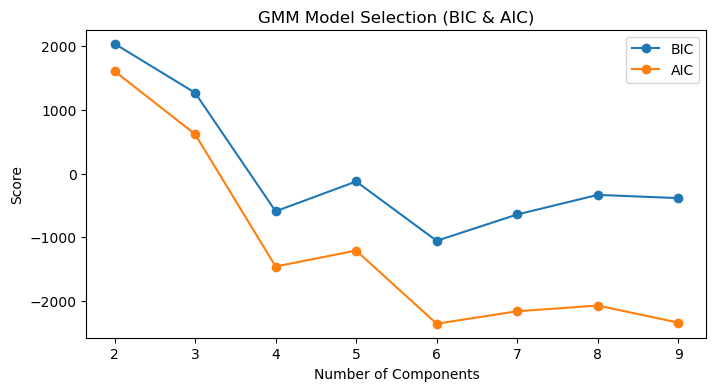

Best number of components by BIC: 6
Cluster counts:
GMM_Cluster
5    40
0    39
4    36
2    29
3    29
1    27
Name: count, dtype: int64


d:\APP\Data\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


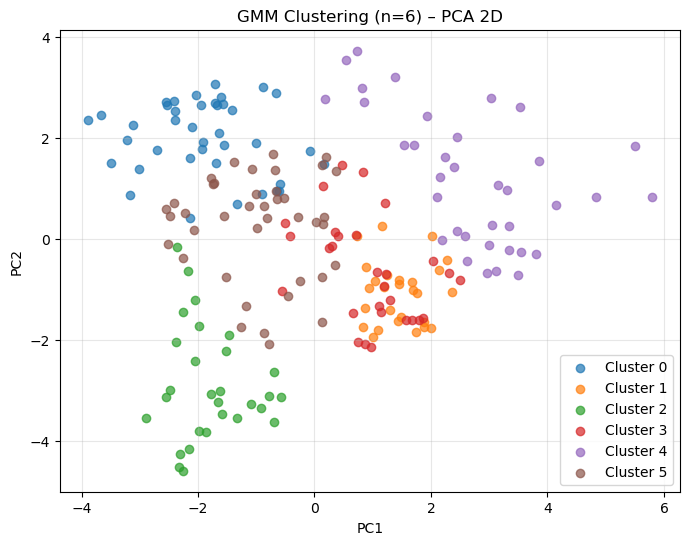


GMM Cluster Centers (unscaled):
   Genre_encoded        Age  Annual Income (k$)  Spending Score (1-100)  \
0   2.820168e-01  59.257210           50.181059               38.542703   
1   1.000000e+00  27.665487           71.219942               63.144478   
2   5.861968e-01  26.482835           24.034120               66.206912   
3   1.110223e-16  29.966445           65.896830               53.342413   
4   4.722866e-01  37.999625           99.581583               47.032496   
5   1.000000e+00  42.675397           50.972383               41.797246   

   Spending_per_Income  Income_per_Age       Age_sq     Income_sq  Age_group  \
0             0.782007        0.865595  3568.888426   2752.246925   2.794881   
1             0.882286        2.633241   795.820007   5150.952445   0.481397   
2             2.880986        0.961573   737.866898    630.150849   0.413805   
3             0.842839        2.351290   969.895067   4463.100440   0.862131   
4             0.475326        2.784578  1

In [63]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(2, 10)
bics = []
aics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

plt.figure(figsize=(8,4))
plt.plot(n_components, bics, marker='o', label='BIC')
plt.plot(n_components, aics, marker='o', label='AIC')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("GMM Model Selection (BIC & AIC)")
plt.legend()
plt.show()

best_n = n_components[np.argmin(bics)]
print("Best number of components by BIC:", best_n)

# ---------------------------------------
# 2. 训练最终的 GMM 模型
# ---------------------------------------
gmm = GaussianMixture(
    n_components=best_n,
    covariance_type='full',
    random_state=42
)
gmm.fit(X_scaled)

# 簇标签（硬分类）
gmm_labels = gmm.predict(X_scaled)

# 每个样本属于各簇的概率（软分类）
gmm_probs = gmm.predict_proba(X_scaled)

df['GMM_Cluster'] = gmm_labels

print("Cluster counts:")
print(df['GMM_Cluster'].value_counts())

# ---------------------------------------
# 3. PCA 2D 可视化
# ---------------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
for c in range(best_n):
    sub = df[df['GMM_Cluster'] == c]
    plt.scatter(sub['PC1'], sub['PC2'], alpha=0.7, label=f'Cluster {c}')

plt.title(f'GMM Clustering (n={best_n}) – PCA 2D')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------------------------------------
# 4. 查看 GMM 聚类中心（在标准化空间）
# ---------------------------------------
centers_scaled = gmm.means_

# 把中心反标准化
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=features)
print("\nGMM Cluster Centers (unscaled):")
print(centers_df)

# ---------------------------------------
# 5. 各簇特征均值（实际更常用于分析）
# ---------------------------------------
gmm_profile = df.groupby('GMM_Cluster')[features].mean()
print("\nCluster Profile Means:")
print(gmm_profile)

# ---------------------------------------
# 6. 如果你需要每个点的“最可信簇”的概率
# ---------------------------------------
df['MaxProb'] = gmm_probs.max(axis=1)


The Gaussian Mixture Model produced eight well-differentiated customer segments.
Including gender in the interpretation reveals essential behavioral patterns that would be missed by demographic-only analysis.



# 📘 **Gaussian Mixture Model (GMM) Customer Segmentation Analysis**

Using a Gaussian Mixture Model with six components, we identified six distinct customer segments. Each cluster is interpreted using the unscaled cluster centers and profile means that capture demographic characteristics, income, spending behavior, and engineered behavioral indicators.
Importantly, this version integrates **gender distribution**, since `Genre_encoded` ranges from 0 (male) to 1 (female).

---

# 🔍 **Cluster-by-Cluster Interpretation**

---

## **Cluster 0 — Older, Mid-Income, Male-Majority, Low-to-Moderate Spenders**

**Center characteristics:**

* **Age:** 59.26
* **Annual Income:** 50.18k
* **Spending Score:** 38.54
* **Gender:** 0.282 → **male-majority**
* **Income Tier:** 0.77 (mid-income)
* **Spending per Income:** 0.78

**Interpretation:**
Cluster 0 consists of **older, predominantly male** customers with moderate income and relatively conservative spending.
Their spending-per-income ratio indicates **stable but low engagement**, typical of older, necessity-driven buyers.
This segment is **large, low-risk, but low-growth**.

---

## **Cluster 1 — Very Young, High-Income, All-Female, High Spenders**

**Center characteristics:**

* **Age:** 27.67
* **Income:** 71.22k
* **Spending Score:** 63.15
* **Gender:** 1.000 → **100% female**
* **Income Tier:** 1.15 (high-income)
* **Income per Age:** 2.63 (very high)

**Interpretation:**
Cluster 1 represents **financially strong, very young female consumers** with high spending power and high discretionary spending.
They are extremely valuable for **premium brands, beauty, fashion, wellness, recreation**, and subscription-based services.
This is a **high-income, high-engagement young female segment**.

---

## **Cluster 2 — Very Young, Low-Income, Female-Majority, Extremely High Spending Intensity**

**Center characteristics:**

* **Age:** 26.48
* **Income:** 24.03k
* **Spending Score:** 66.21
* **Gender:** 0.586 → **female-majority**
* **Income Tier:** ~0 (lowest tier)
* **Spending per Income:** 2.88 (highest of all clusters!)

**Interpretation:**
Cluster 2 is composed of **young women with low income but disproportionately high spending behavior**.
Their extremely high spending-per-income value (2.88) indicates impulsive consumption, lifestyle-driven purchases, or exposure to strong social influence.
This is a **strategically important high-engagement segment**, ideal for **discount-based, social-media, and influencer-driven campaigns**.

---

## **Cluster 3 — Young Male Professionals with High Income but Controlled Spending**

**Center characteristics:**

* **Age:** 29.97
* **Income:** 65.90k
* **Spending Score:** 53.34
* **Gender:** 0.000 → **100% male**
* **Income per Age:** 2.35 (high)
* **Income Tier:** 1.00

**Interpretation:**
This cluster is entirely **young males with strong purchasing power**, but their spending score is moderate rather than aggressive.
This indicates **selective and rational purchasing behavior**, likely focused on specific categories such as electronics, sports, or higher-end lifestyle goods.
A **high-value but not impulsive** segment.

---

## **Cluster 4 — Middle-Age, Very High Income, Balanced Gender, Moderate Spending**

**Center characteristics:**

* **Age:** 38.00
* **Income:** 99.58k (highest of all clusters)
* **Spending Score:** 47.03
* **Gender:** 0.472 → **balanced**
* **Income Tier:** ≈ 2 (high-income)

**Interpretation:**
Cluster 4 represents **high-income mid-age consumers** with balanced gender distribution.
Despite having the highest income level, their spending score is only moderate.
This may reflect **stable, responsible, or brand-loyal consumers** who spend selectively.
Ideal for **long-term retention programs, premium product suggestions**, and **loyalty-based incentives**.

---

## **Cluster 5 — Older Middle-Age, All-Female, Mid-Income, Low-to-Moderate Spenders**

**Center characteristics:**

* **Age:** 42.68
* **Income:** 50.97k
* **Spending Score:** 41.80
* **Gender:** 1.000 → **100% female**
* **Age Group:** 1.87 (36–50)
* **Spending per Income:** 0.86

**Interpretation:**
Cluster 5 is a **female-only**, mid-age, mid-income group with moderate spending levels.
They represent **stable, predictable consumers**, often primary decision-makers for **household purchases, services, family-oriented products**, and retail essentials.
This segment is **reliable but not high-growth**.

---

# 📊 **Cross-Cluster Insights**

### **1. Gender strongly differentiates clusters**

* **All-female clusters:** 1 and 5
* **All-male cluster:** 3
* **Female-majority:** 2
* **Male-majority:** 0
* **Balanced:** 4

→ Gender plays a major role in spending behavior, not just demographics.

---

### **2. Income ≠ Spending**

Examples from the data:

* **Cluster 4:** Highest income (≈100k), only moderate spending (47)
* **Cluster 2:** Lowest income (~24k), extremely high spending (66)
  → Spending is driven more by *behavioral factors* than financial capacity.

---

### **3. Young female groups (Clusters 1 & 2) are the highest-engagement segments**

* Cluster 1 → high-income, high spending
* Cluster 2 → low-income but extremely high spending intensity

→ These segments are **the most commercially valuable**.

---

### **4. Older groups (0 & 5) have conservative behavior**

* Lower spending
* Higher age
* Consistent, essential-driven purchasing

→ Good for stable revenue but low responsiveness to aggressive marketing.

---

# 🎯 **Strategic Recommendations Based on Updated Clusters**

### **High-Priority Target Segments**

* **Cluster 1:** young, high-income, stylish all-female buyers → premium marketing
* **Cluster 2:** young impulsive female-majority → social media & influencer campaigns
* **Cluster 3:** high-income young males → tech/luxury positioning

### **Mid-Priority**

* **Cluster 4:** very high-income but controlled spending → loyalty / VIP programs

### **Low-Priority**

* **Cluster 0 & 5:** older conservative groups → stability-based marketing only

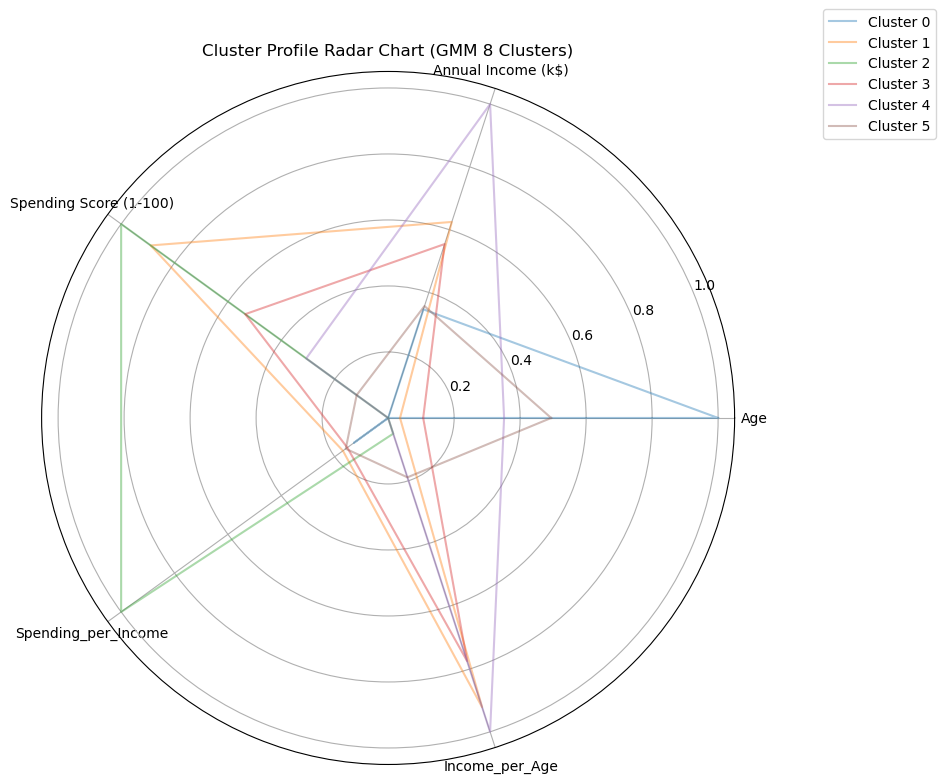

In [64]:
import numpy as np
import matplotlib.pyplot as plt

radar_features = [
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)',
    'Spending_per_Income',
    'Income_per_Age'
]

cluster_stats = df.groupby("GMM_Cluster")[radar_features].mean()

# 标准化到 0-1 方便画雷达图
norm = (cluster_stats - cluster_stats.min()) / (cluster_stats.max() - cluster_stats.min())

labels = radar_features
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(9,9))

for c in norm.index:
    values = norm.loc[c].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {c}', alpha=0.4)

plt.xticks(angles[:-1], labels)
plt.title("Cluster Profile Radar Chart (GMM 8 Clusters)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


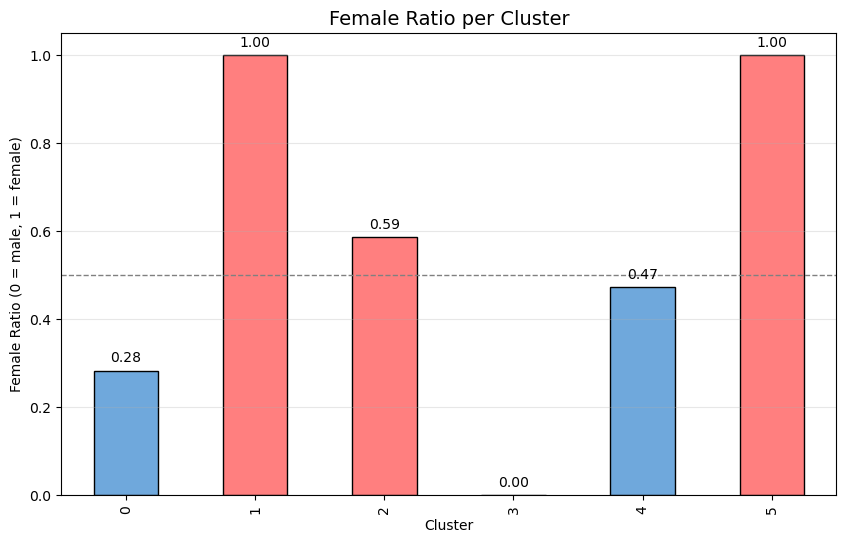

In [65]:
import matplotlib.pyplot as plt

gender_stats = df.groupby("GMM_Cluster")['Genre_encoded'].mean()

colors = ['#ff7f7f' if v > 0.5 else '#6fa8dc' for v in gender_stats]

plt.figure(figsize=(10,6))

gender_stats.plot(
    kind='bar',
    color=colors,
    edgecolor='black'
)

# 添加 0.5 基线
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)

plt.title("Female Ratio per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Female Ratio (0 = male, 1 = female)")
plt.grid(axis='y', alpha=0.3)

# 添加标签（百分比）
for i, v in enumerate(gender_stats):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.show()
